In [1]:
import pandas as pd

df = pd.read_csv("data/train.csv")
df = pd.read_csv("data/train.csv")
df = df.dropna()
X1 = df["question1"].values
X2 = df["question2"].values
y = df["is_duplicate"].values
X= [X1, X2]

In [2]:
import numpy as np
length = [len(x.split()) for x in X[0]]
length.extend([len(x.split()) for x in X[1]])

In [3]:
from hedgeable_ai.models.nn.utils import generator

Using TensorFlow backend.


In [4]:
%%time

# batch_X = generator(X, 128) 

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.58 µs


In [5]:
# batch_y = generator([y], 128)

In [6]:
maxlen = 2 * int(np.mean(length))

In [7]:
from hedgeable_ai.functions.preprocessing import SentenceProcessor

processor = SentenceProcessor(None, "d2v", maxlen=maxlen, vector_file_path="data/enwiki_dbow/doc2vec.bin")

In [8]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [9]:
import tensorflow as tf
from hedgeable_ai.models.nn.rnn import RNNModel
from hedgeable_ai.models.nn.ff import MLPModel
from hedgeable_ai.functions.classification.nn import MultiNNClassifier


conf = {"model":[{"name": "dense", "num_hidden": 256, "is_batch": True, "activation": tf.nn.relu},
                 {"name": "dense", "num_hidden": 10, "is_batch": False, "activation": tf.nn.relu}],
        "input_model":[[{"name": "dense", "num_hidden": 512, "is_batch": True, "activation": tf.nn.relu},
                        {"name": "dense", "num_hidden": 512, "is_batch": True, "activation": tf.nn.relu},],
                        [{"name": "dense", "num_hidden": 512, "is_batch": True, "activation": tf.nn.relu},
                       {"name": "dense", "num_hidden": 512, "is_batch": True, "activation": tf.nn.relu},],],
        "learning_rate": 1e-3,
        "learning_rate_decay_step": 1000,
        "learning_rate_decay": 0.9,
        "learning_rate_minimum": 1e-3,
        "batch_size":128,
       }


tf.reset_default_graph()
N = 1000
input_model = [MLPModel, MLPModel]
output_model = MLPModel
model = MultiNNClassifier([300, 300], 1, input_model, output_model, conf, processor=processor, is_sequence=False)
model.train([X[0][:N], X[1][:N]], y[:N], num_epochs=1000, batch_log_freq=1, is_processed=False, 
            batch_bar=False, is_memory_intensive=True)

/home/tomoaki/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/tomoaki/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/tomoaki/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/tomoaki/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullar

Model saved in file: params/model.ckpt
start training!


 10%|▉         | 97/1000 [01:58<18:39,  1.24s/it]

Model saved in file: params/model.ckpt


In [10]:
N=1000

# output = model.predict_conf([X[0][:N], X[1][:N]], is_processed=False)
output = model.predict_conf([X[0][:N], X[1][:N]], is_processed=False)

In [12]:
np.abs(output - y[:N])

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0,

In [13]:
np.mean(np.abs(output - y[:N]))

0.38

In [14]:
np.mean(y[:N])

0.38

(array([   6.,   10.,   20.,   38.,   76.,  116.,  230.,  354.,  141.,    9.]),
 array([ 0.19851676,  0.22665659,  0.25479642,  0.28293625,  0.31107607,
         0.3392159 ,  0.36735573,  0.39549556,  0.42363539,  0.45177522,
         0.47991505]),
 <a list of 10 Patch objects>)

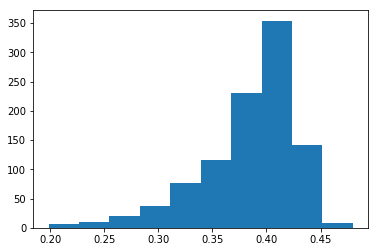

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(output)

In [12]:
output

array([[ 0.41465354],
       [ 0.38027272],
       [ 0.41414425],
       [ 0.40049332],
       [ 0.37996367],
       [ 0.42785853],
       [ 0.44942853],
       [ 0.32052585],
       [ 0.3681238 ],
       [ 0.39914536],
       [ 0.43231565],
       [ 0.40057218],
       [ 0.41192287],
       [ 0.39342278],
       [ 0.41162059],
       [ 0.41087863],
       [ 0.40026006],
       [ 0.42290539],
       [ 0.38624594],
       [ 0.35171321],
       [ 0.42634669],
       [ 0.38169208],
       [ 0.38436523],
       [ 0.30997798],
       [ 0.426891  ],
       [ 0.42535552],
       [ 0.43824121],
       [ 0.37777874],
       [ 0.38322541],
       [ 0.39453813],
       [ 0.42156884],
       [ 0.42029637],
       [ 0.39514905],
       [ 0.39029554],
       [ 0.41371468],
       [ 0.42144305],
       [ 0.37228465],
       [ 0.33374283],
       [ 0.3719317 ],
       [ 0.42484695],
       [ 0.40442386],
       [ 0.45779261],
       [ 0.40882912],
       [ 0.40254581],
       [ 0.36678052],
       [ 0

In [ ]:
np.median(output)

In [ ]:
output